In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:
def ackley(x):
    d = len(x)
    a = 20
    b = 0.2
    c = 2 * np.pi
    first_sum = np.sum(np.square(x))
    second_sum = np.sum(np.cos(np.multiply(c, x)))
    return -a*np.exp(-b*np.sqrt(first_sum / d)) - np.exp(second_sum / d) + a + np.exp(1)

In [9]:
n = 5
bounds = [(-32, 32) for _ in range(n)]

Koristeći optimizaciju rojem čestica (PSO) minimizovati Aklijevu funkciju na datom opsegu.

Napraviti klasu $Particle$ koja predstavlja jednu česticu i ima metode $updatePosition$ i $updateVelocity$ koji ažuriraju poziciju i brzinu čestice.

Za parametre $w$, $c1$ i $c2$ uzeti redom vrednosti $0.75$, $1$ i $2$.

In [45]:
class Particle:
    
    def __init__(self, objective, bounds, w, c1, c2):
#         POCETAK STUDENTSKOG KODA
        self.position = np.array([random.uniform(b[0], b[1]) for b in bounds])
        self.velocity = np.array([random.uniform( -(b[1]-b[0]), (b[1]-b[0])) for b in bounds])
#         KRAJ STUDENTSKOG KODA
        self.bestPosition = np.array(self.position)
        self.currentValue = objective(self.position)
        self.bestValue = objective(self.bestPosition)
        
        self.objective = objective
        self.bounds = bounds
        self.w = w
        self.c1 = c1
        self.c2 = c2
        
    def updatePosition(self, globalBestPosition, globalBestValue):
#         POCETAK STUDENTSKOG KODA
        lowerBounds = [b[0] for b in bounds]
        upperBounds = [b[1] for b in bounds]
        self.position = np.clip(self.position + self.velocity, lowerBounds, upperBounds)
        
        self.currentValue = self.objective(self.position)
        
        if self.currentValue < self.bestValue:
            self.bestPostion = self.position.copy()
            self.bestValue = self.currentValue
        if self.currentValue < globalBestValue:
            globalBestValue = self.currentValue
            globalBestPosition = self.position.copy()
            
#         KRAJ STUDENTSKOG KODA
    
    def updateVelocity(self, globalBestPosition):
#         POCETAK STUDENTSKOG KODA
        r_l = random.random()
        r_g = random.random()
        
        self.velocity = (self.w * self.velocity
                        + self.c1 * r_l * (self.bestPosition - self.position)
                        + self.c2 * r_g * (globalBestPosition - self.position))
#         KRAJ STUDENTSKOG KODA

Napisati funkciju $pso$ koja pravi roj od $numParticles$ čestica i vrši optimizaciju.

Uslov zaustavljanja je broj iteracija $iters$.

Nacrtati grafik promene vrednosti najboljeg rešenja kroz iteracije.

Iz funkcije vratiti poziciju i vrednost najboljeg rešenja.

In [51]:
def pso(numParticles, iters):
#     POCETAK STUDENTSKOG KODA
    swarm = [Particle(ackley, bounds, 0.75, 1, 2) for _ in range(numParticles)]
    
    globalBestPosition = swarm[0].bestPosition
    globalBestValue = swarm[0].bestValue
    
    bestValues = []
    
    for i in range(iters):
        for particle in swarm:
            particle.updateVelocity(globalBestPosition)
            particle.updatePosition(globalBestPosition, globalBestValue)
        bestValues.append(globalBestValue)
        
    # NOTE: 
    # iako kod deluje skroz tacan, ne uspeva da se nadje optimum (?)

    plt.plot(range(iters), bestValues)
    plt.show()
    print(f"Best position: {globalBestPosition}, value: {globalBestValue}")
#     KRAJ STUDENTSKOG KODA

Minimum ove funkcije je nula i dostiže se u nuli.

20.690302663306348
20.690302663306348
20.690302663306348
20.690302663306348
20.690302663306348


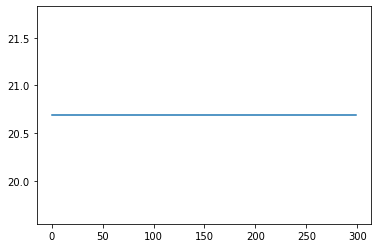

Best position: [ -8.04222477 -30.86859626 -11.06117515 -13.30103973 -30.83889141], value: 20.690302663306348


In [50]:
pso(25, 300)